In [2]:
import pandas as pd
import seaborn as sns

In [97]:
df = pd.read_csv("data.csv")
df["date"] = pd.to_datetime(df["date"])
df.set_index("date", inplace = True, drop=True)
df.describe()

,Cumulative_solar_power,kWh electricity/day,Gas/day
count,3304.000000,3304.000000,3304.000000
mean,17616.116435,4.585048,8.343705
std,10577.158537,9.856726,6.334102
min,0.100000,-24.000000,0.000000
25%,8089.500000,-3.000000,2.000000
50%,17184.500000,6.000000,8.000000
75%,27116.500000,13.000000,13.000000
max,36469.000000,34.000000,29.000000


In [98]:
type(df["Cumulative_solar_power"])

pandas.core.series.Series

In [100]:
#Measurements are from the day before
df = df.shift(periods=-1, freq='D', axis=0)

<AxesSubplot:xlabel='date'>

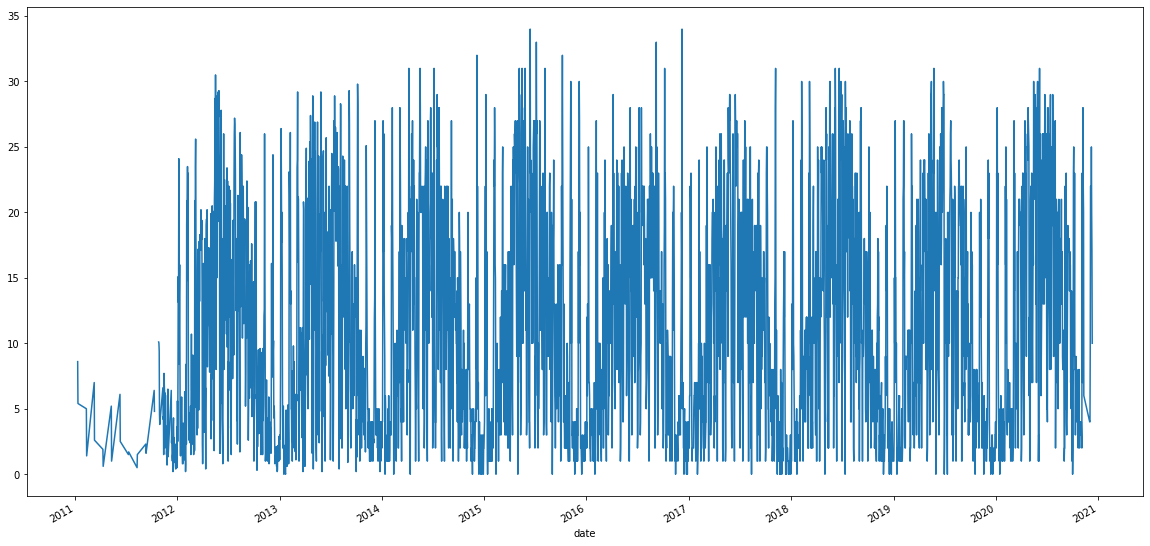

In [94]:
df["per_day"]  = df["Cumulative_solar_power"].diff()
df["per_day"].plot(figsize=(20,10))


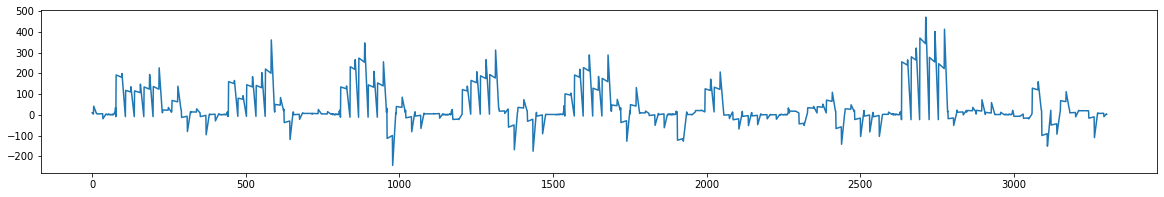

In [96]:
from statsmodels.nonparametric.smoothers_lowess import lowess

import matplotlib.pyplot as plt
smvd = lowess(df["per_day"], df.index, is_sorted = True, frac = 0.015, it = 2)
plt.plot(smvd[:,1])

<AxesSubplot:>

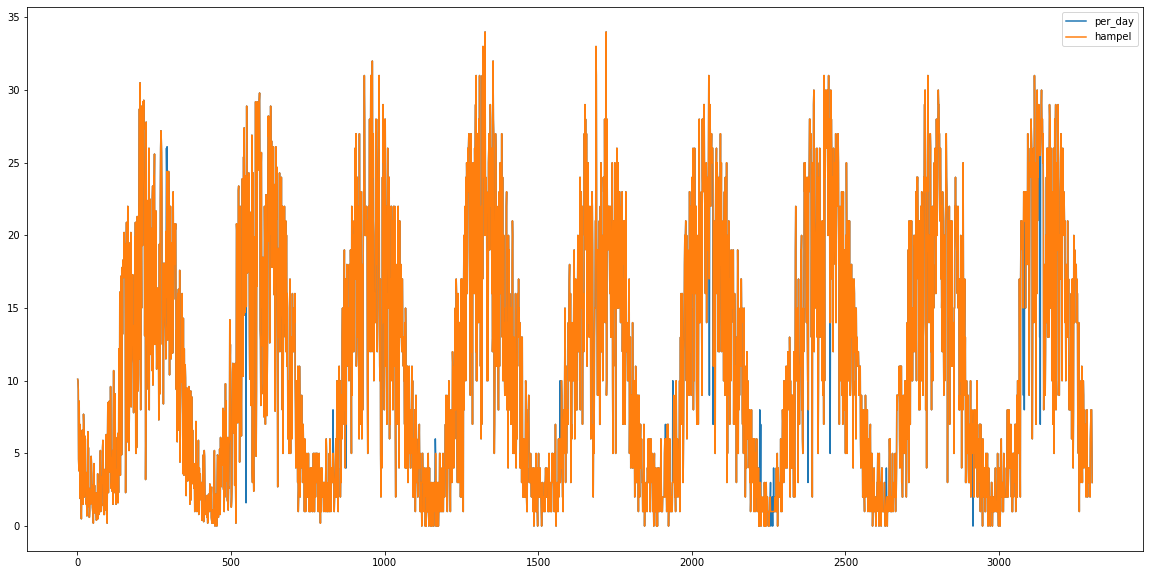

In [89]:
from hampel import hampel
from matplotlib.pyplot import figure
df["hampel"] = hampel(df["per_day"], window_size=14, n=3, imputation=True)
df[[ "per_day","hampel"]].plot(figsize=(20,10))


<AxesSubplot:xlabel='date'>

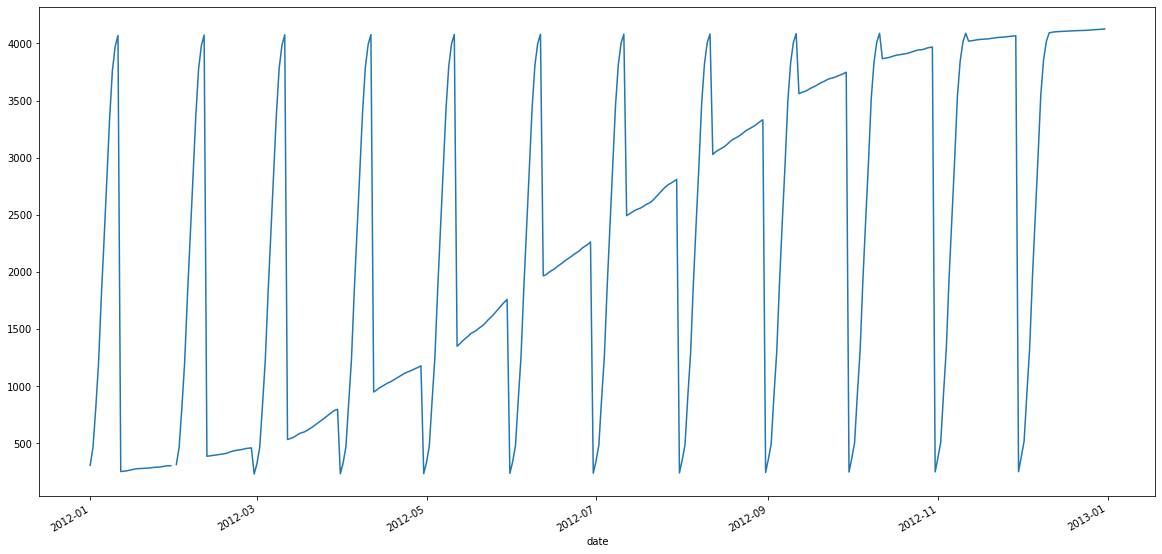

In [29]:
df2012 = df[df.index.year.isin([2012])]
df2012["Cumulative_solar_power"].rolling(2, win_type='gaussian').mean(std=1000).plot(figsize=(20,10))

<AxesSubplot:>

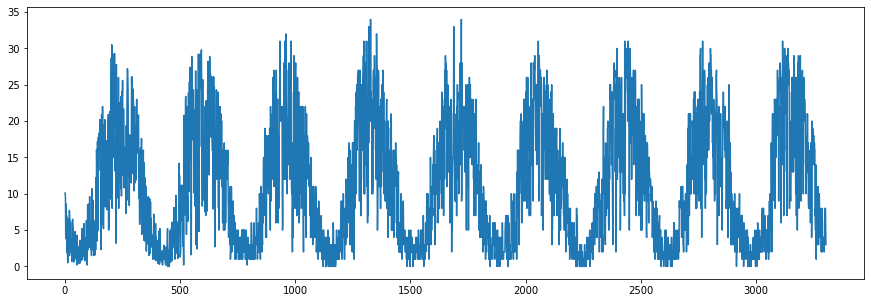

In [38]:
df["Sp/day"]  = df["Cumulative_solar_power"].diff()
df["Sp/day"].plot(figsize=(15,5))

<AxesSubplot:xlabel='date'>

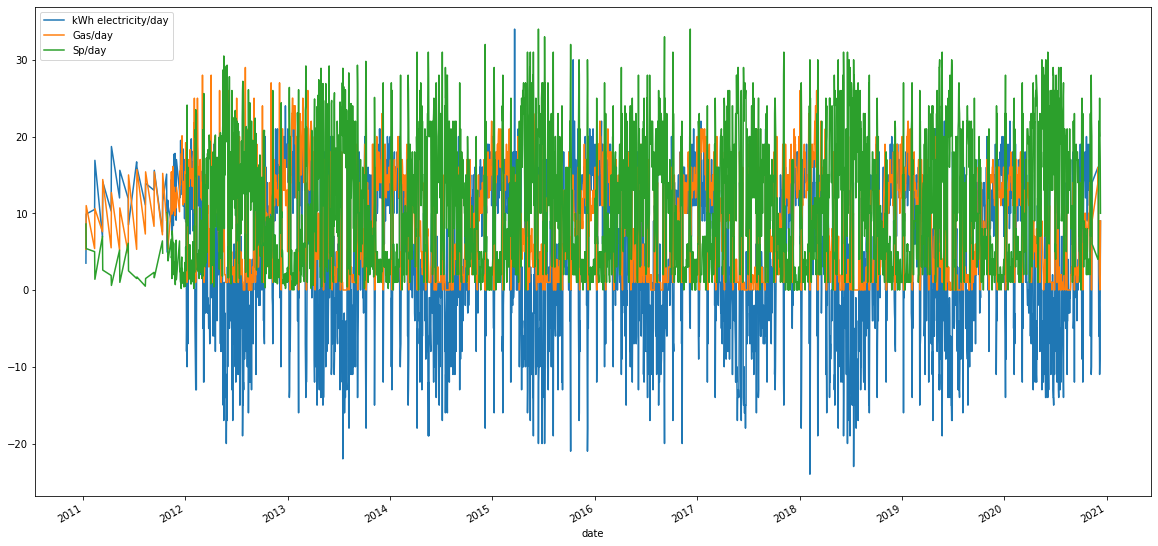

In [5]:
df.drop("Cumulative_solar_power", axis=1).plot(figsize=(20,10))

<AxesSubplot:>

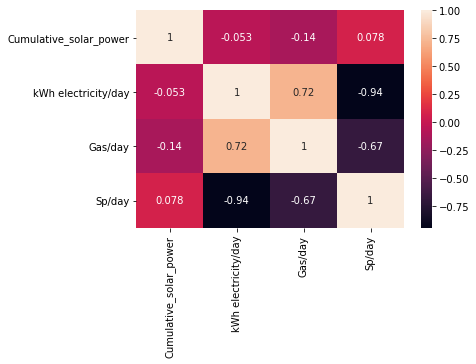

In [6]:
sns.heatmap(df.corr(), annot=True)

Strong correlation between solarpower/day and kWh, and weaker but still apparent coorelation between target and gas/day.

In [7]:
df_cum = df.pop("Cumulative_solar_power")

<AxesSubplot:xlabel='date'>

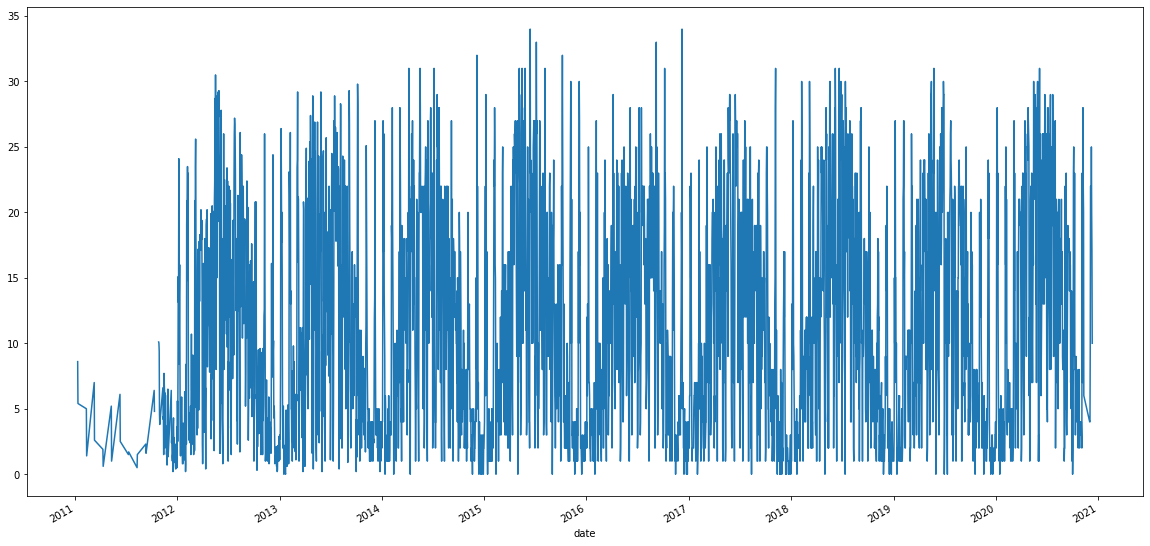

In [8]:
df["Sp/day"].plot(figsize=(20,10))

<AxesSubplot:xlabel='date'>

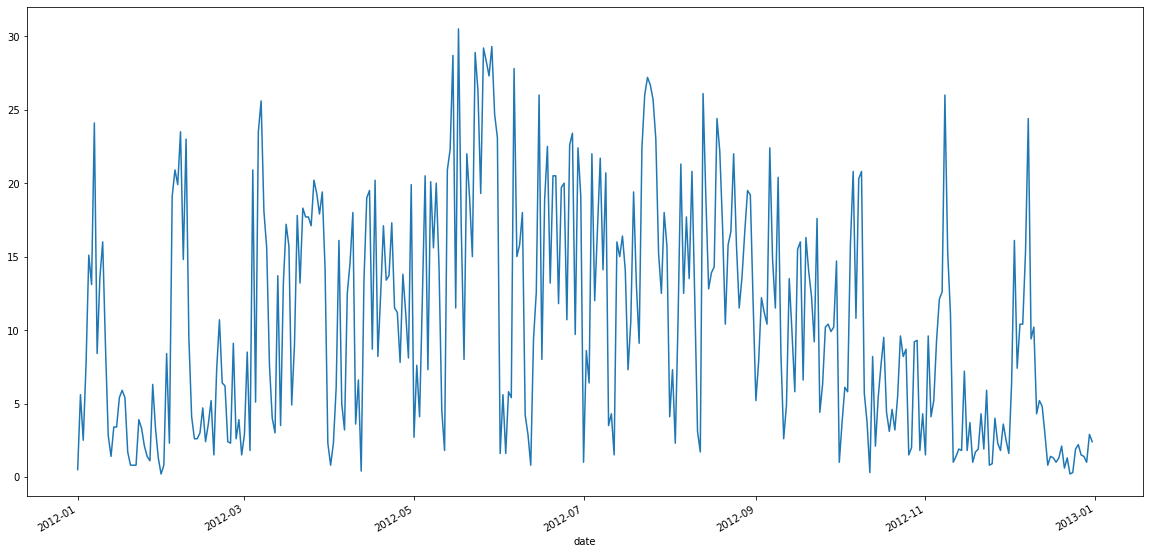

In [9]:
df[df.index.year.isin([2012])]["Sp/day"].plot(figsize=(20,10))

In [10]:
df2012 = df[df.index.year.isin([2012])]
df2012 = df2012[["Sp/day"]]

<AxesSubplot:xlabel='date'>

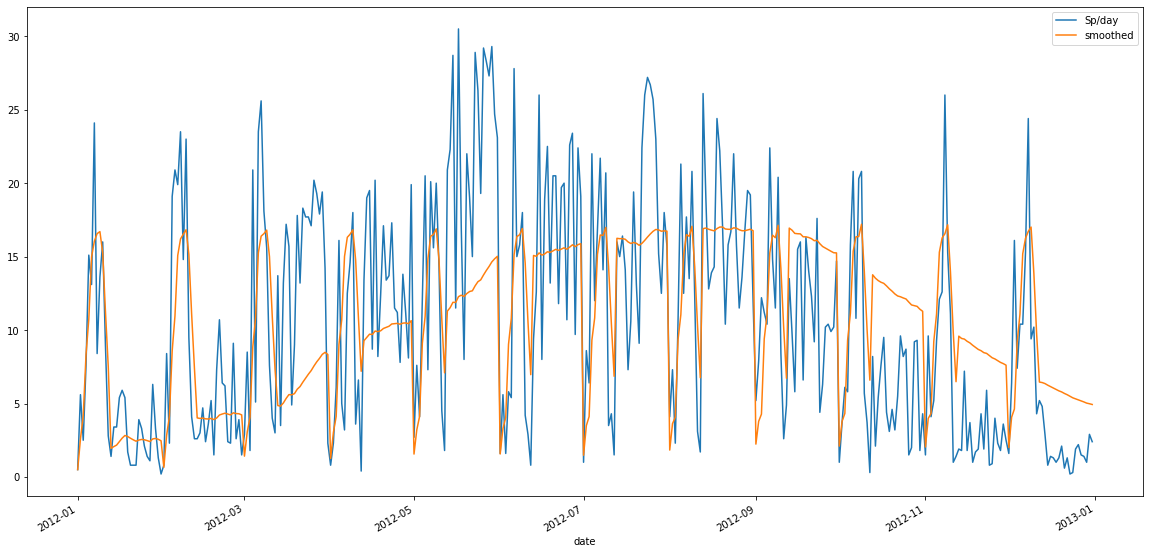

In [11]:
df2012["smoothed"] = df2012["Sp/day"].ewm(span = 100).mean()
df2012.plot(figsize=(20,10))

In [12]:
df

,kWh electricity/day,Gas/day,Sp/day
date,,,
2011-10-26,15.1,9.0,NaN
2011-10-27,7.4,9.2,10.1
2011-10-28,5.8,8.0,10.0
2011-10-29,4.9,6.6,9.4
2011-10-30,11.7,5.3,4.6
...,...,...,...
2020-06-11,16.0,11.0,8.0
2020-07-11,13.0,13.0,8.0
2020-08-11,12.0,11.0,8.0


<AxesSubplot:xlabel='date'>

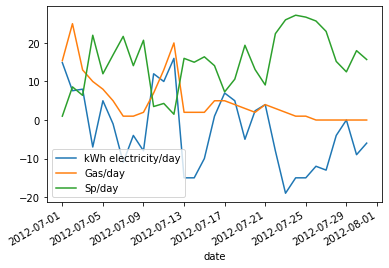

In [13]:
df.loc["2012-07-01" : "2012-07-31"].plot()

In [15]:
df[["Sp/day"]]

,Sp/day
date,
2011-10-26,NaN
2011-10-27,10.1
2011-10-28,10.0
2011-10-29,9.4
2011-10-30,4.6
...,...
2020-06-11,8.0
2020-07-11,8.0
2020-08-11,8.0
